In [1]:
import matplotlib.pyplot as plt
from matplotlib import image
import numpy as np

In [9]:
rgb_rate = np.arange(0,256)

In [8]:
def ploting_images(image , title) :
    plt.imshow(image)
    plt.title(title)
    plt.show()
    type(image)

In [7]:
def bar_function(X,Y,title,x_lable,y_lable,subplot_num1,subplot_num2,subplot_num3):
    plt.subplot(subplot_num1,subplot_num2,subplot_num3)
    plt.plot(X,Y)
    plt.title(title)
    plt.xlabel(x_lable)
    plt.ylabel(y_lable)
    plt.show()

In [6]:
def green_rate_plot(img,rgb_rate):
    green_rate = np.arange(0,256)*0
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            green_rate[img[i,j,1]] += 1
    bar_function(rgb_rate,green_rate,"green Rate bar plot","RGB rate","green Count per pixel",2,2,2)
    return green_rate
    

In [5]:
def red_rate_plot(img,rgb_rate):
    red_rate = np.arange(0,256)*0
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            red_rate[img[i,j,0]] += 1
    bar_function(rgb_rate,red_rate,"red Rate bar plot","RGB rate","red Count per pixel",2,2,1)  
    return red_rate

In [4]:
def blue_rate_plot(img,rgb_rate):
    blue_rate = np.arange(0,256)*0
    for i in range(0,img.shape[0]):
        for j in range(0,img.shape[1]):
            blue_rate[img[i,j,2]] += 1
    bar_function(rgb_rate,blue_rate,"blue Rate bar plot","RGB rate","green Count per pixel",2,2,3) 
    return blue_rate

In [13]:
def main_rgb_of_source_images(source_image,rgb_rate,rate):
    reference_image_red_rate = red_rate_plot(source_image,rgb_rate)
    reference_image_green_rate = green_rate_plot(source_image,rgb_rate)
    reference_image_blue_rate = blue_rate_plot(source_image,rgb_rate)
    
    #average section
    total_rgb_sum = np.sum(np.arange(0,255))
    sumation_red_rate_pixle_mul = reference_image_red_rate[0] 
    sumation_green_rate_pixle_mul = reference_image_green_rate[0]
    sumation_blue_rate_pixle_mul = reference_image_blue_rate[0] 
    for rgb_number in range(1,255) :
         sumation_red_rate_pixle_mul += (rgb_number * reference_image_red_rate[rgb_number]) / total_rgb_sum
         sumation_green_rate_pixle_mul += (rgb_number * reference_image_green_rate[rgb_number]) / total_rgb_sum
         sumation_blue_rate_pixle_mul +=  (rgb_number * reference_image_blue_rate[rgb_number]) / total_rgb_sum
        
    max_red_pixel = np.amax(reference_image_red_rate)
    max_green_pixel = np.amax(reference_image_green_rate)
    max_blue_pixel = np.amax(reference_image_blue_rate)
    
    index_max_red_pixel = np.where(reference_image_red_rate == max_red_pixel)[0]
    index_max_green_pixel = np.where(reference_image_green_rate == max_green_pixel)[0]
    index_max_blue_pixel = np.where(reference_image_blue_rate == max_blue_pixel)[0]
    
    if index_max_red_pixel == 0 : index_max_red_pixel -=-1
    if index_max_green_pixel == 0 : index_max_green_pixel -=-1
    if index_max_blue_pixel == 0 : index_max_blue_pixel -=-1
    
    red_main_rgb = (index_max_red_pixel  *  max_red_pixel) / (sumation_red_rate_pixle_mul * rate)
    green_main_rgb = ( index_max_green_pixel  *  max_green_pixel ) /(sumation_green_rate_pixle_mul * rate)
    blue_main_rgb = ( index_max_blue_pixel *  max_blue_pixel) / ( sumation_blue_rate_pixle_mul * rate)
    print("red main rgb: ",red_main_rgb)
    print("green main rgb: ",green_main_rgb)
    print("blue main rgb: ", blue_main_rgb)
    return red_main_rgb , green_main_rgb , blue_main_rgb
    

In [14]:
def combanition_method(reference_image,red_main_rgb , green_main_rgb , blue_main_rgb):
   for i in range(0,reference_image.shape[0]):
         for j in range(0,reference_image.shape[1]):
             
               if reference_image[i,j,0] + red_main_rgb[0] > 255 :  reference_image[i,j,0] = 255
               else : reference_image[i,j,0] += red_main_rgb[0]
                
               if reference_image[i,j,1] + green_main_rgb[0] > 255 :  reference_image[i,j,1] = 255
               else : reference_image[i,j,1] += green_main_rgb[0]
                
               if reference_image[i,j,2] + blue_main_rgb[0] > 255 :  reference_image[i,j,2] = 255
               else : reference_image[i,j,2] += blue_main_rgb[0]
               
   ploting_images(reference_image , "Combined Image")

# Testing Samples!

</br></br></br></br>

# First Samples(Road and Green Hill)

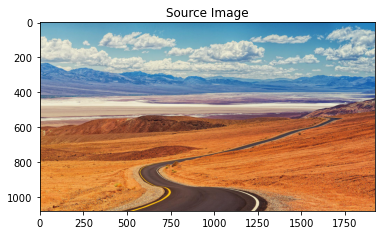

In [15]:
#second image
source_image = image.imread('Source.jpg')
ploting_images(source_image , "Source Image")

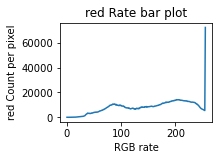

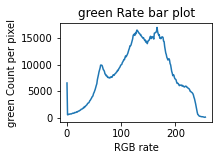

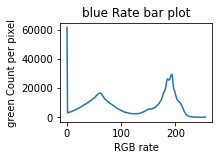

red main rgb:  [18.7197443]
green main rgb:  [1.85268085]
blue main rgb:  [0.00890803]


In [17]:
red_main_rgb , green_main_rgb , blue_main_rgb = main_rgb_of_source_images(source_image,rgb_rate,100)

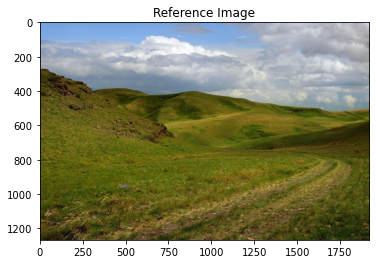

In [16]:
#reference image
reference_image = image.imread('Reference.jpg')
ploting_images(reference_image , "Reference Image")

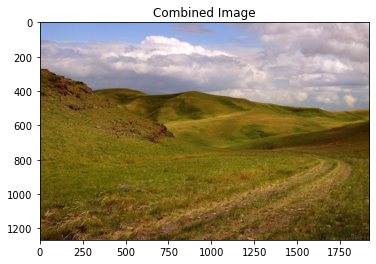

In [18]:
combanition_method(reference_image,red_main_rgb , green_main_rgb , blue_main_rgb)

# Second samples (Cat and Coffee)

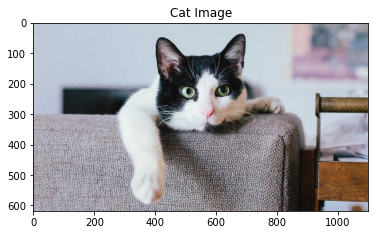

In [19]:
#reference image
Cat_image = image.imread('Cat.jpg')
ploting_images(Cat_image , "Cat Image")

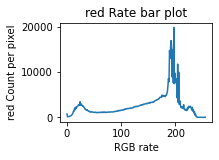

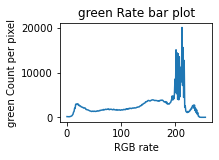

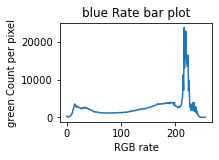

red main rgb:  [13.40283675]
green main rgb:  [17.24794915]
blue main rgb:  [19.23237049]


In [24]:
red_main_rgb2 , green_main_rgb2 , blue_main_rgb2 = main_rgb_of_source_images(Cat_image,rgb_rate,75)

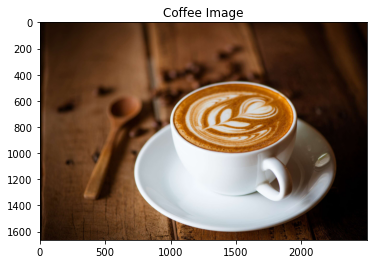

In [25]:
Coffee_image = image.imread('Coffee.jpg')
ploting_images(Coffee_image , "Coffee Image")

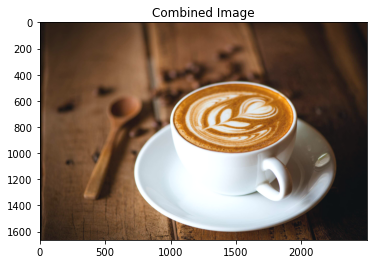

In [26]:
combanition_method(Coffee_image,red_main_rgb2 , green_main_rgb2 , blue_main_rgb2)

# Third Samples(Dark Image And yellow Light)

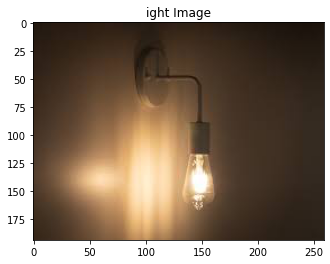

In [36]:
ight_image = image.imread('ight.jpg')
ploting_images(ight_image , "ight Image")

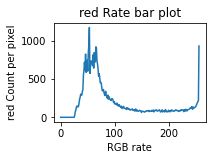

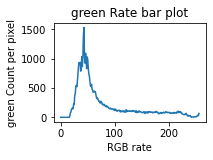

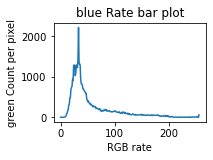

In [44]:
red_main_rgb3 , green_main_rgb3 , blue_main_rgb3 = main_rgb_of_source_images(ight_image,rgb_rate,10)

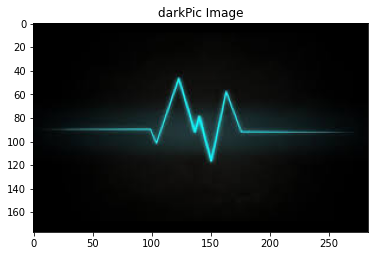

In [48]:
darkPic_image = image.imread('darkPic.jpg')
ploting_images(darkPic_image , "darkPic Image")

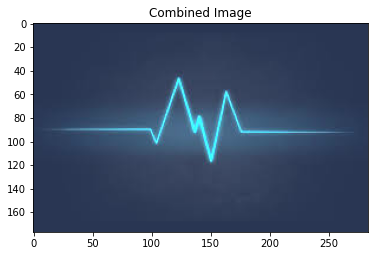

In [49]:
combanition_method(darkPic_image,red_main_rgb3 , green_main_rgb3 , blue_main_rgb3)

In [45]:
print(red_main_rgb3 , green_main_rgb3 , blue_main_rgb3)

[41.82644547] [54.88651191] [83.83937491]
